# Data Science Project
# From Adidas Sales Database

- Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

- Load and Inspect Data

In [2]:
df = pd.read_excel('adidas data.xlsx')

In [7]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,NaN,Foot Locker,1185732,43831,Northeast,New York,New York,Men's Street Footwear,$50.00,1200,60000,"$30,000",In-store
1,NaN,Foot Locker,1185732,43832,Northeast,New York,New York,Men's Athletic Footwear,$50.00,1000,50000,"$15,000",In-store
2,NaN,Foot Locker,1185732,43833,Northeast,New York,New York,Women's Street Footwear,$40.00,1000,40000,"$14,000",In-store
3,NaN,Foot Locker,1185732,43834,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,38250,"$13,388",In-store
4,NaN,Foot Locker,1185732,43835,Northeast,New York,New York,Men's Apparel,$60.00,900,54000,"$16,200",In-store


In [8]:
df.shape

(9648, 13)

In [9]:
df.columns

Index(['Unnamed: 0', 'Retailer', 'Retailer ID', 'Invoice Date', 'Region',
       'State', 'City', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Sales Method'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   Retailer          9648 non-null   object 
 2   Retailer ID       9648 non-null   int64  
 3   Invoice Date      9648 non-null   int64  
 4   Region            9641 non-null   object 
 5   State             9648 non-null   object 
 6   City              9648 non-null   object 
 7   Product           9648 non-null   object 
 8   Price per Unit    9646 non-null   object 
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   int64  
 11  Operating Profit  9648 non-null   object 
 12  Sales Method      9648 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 980.0+ KB


## Data Cleaning

- Drop Unneeded Columns

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.drop('Invoice Date',axis=1,inplace=True)

- Edit The Numerical Columns

In [5]:
df['Price per Unit'] = df['Price per Unit'].str.replace('$', ' ')

In [6]:
df['Operating Profit'] = df['Operating Profit'].str.replace('$', ' ')

In [7]:
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '.')

- Detect The Data Types

In [8]:
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'])

In [9]:
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'])

In [62]:
df.dtypes

Retailer             object
Retailer ID           int64
Region               object
State                object
City                 object
Product              object
Price per Unit      float64
Units Sold            int64
Total Sales           int64
Operating Profit    float64
Sales Method         object
dtype: object

- Check and Handle Nulls

In [19]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Region              7
State               0
City                0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

In [10]:
avg_price = df['Price per Unit'].mean()

In [11]:
df['Price per Unit'].fillna(avg_price, inplace=True)

In [12]:
df['Region'].fillna(method='ffill',inplace=True)

- Check Duplicates

In [71]:
df.duplicated().sum()

283

In [75]:
dup_rows = df.duplicated()
dup_data = df[dup_rows]
dup_data.head()
# so we do not have real duplicated rows

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
14,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40.0,950,38000,13.300,Outlet
19,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,45000,13.500,Outlet
21,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,37125,12.994,Outlet
23,Foot Locker,1185732,Northeast,New York,New York,Women's Apparel,50.0,950,47500,11.875,Outlet
39,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,50.0,900,45000,15.750,Outlet


## Exploratory Data Analysis

### Statstical Analysis

In [80]:
df.drop('Retailer ID',axis=1).describe().round(1)

,Price per Unit,Units Sold,Total Sales,Operating Profit
count,9648.0,9648.0,9648.0,9648.0
mean,45.2,256.9,9327.4,165.4
std,14.7,214.3,14191.6,191.8
min,7.0,0.0,0.0,0.0
25%,35.0,106.0,425.8,8.4
50%,45.0,176.0,958.0,101.0
75%,55.0,350.0,15000.0,267.0
max,110.0,1275.0,82500.0,998.0


In [86]:
# What is the total sales for each retailer? 
df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)

Retailer
West Gear        24296490
Foot Locker      22009528
Sports Direct    18247156
Kohl's           10211506
Amazon            7769912
Walmart           7455850
Name: Total Sales, dtype: int64

In [88]:
# Which retailer has the highest operating profit?
df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).head(1)

Retailer
West Gear    410680.353
Name: Operating Profit, dtype: float64

In [90]:
# What is the average price per unit across all products?
df.groupby('Product')['Price per Unit'].mean().round(2).sort_values(ascending=False)

Product
Men's aparel                 60.00
Women's Apparel              51.60
Men's Apparel                50.31
Men's Street Footwear        44.24
Men's Athletic Footwear      43.78
Women's Athletic Footwear    41.11
Women's Street Footwear      40.25
Name: Price per Unit, dtype: float64

In [92]:
# How many units were sold in each region?
df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)

Region
West         686985
Northeast    501279
South        492260
Southeast    407000
Midwest      391337
Name: Units Sold, dtype: int64

In [94]:
# Which state has the highest total sales?
df.groupby('State')['Total Sales'].max().sort_values(ascending=False).head(1)

State
Florida    82500
Name: Total Sales, dtype: int64

In [106]:
# What is the most common sales method used by retailers?
df['Sales Method'].value_counts().idxmax()

'Online'

In [107]:
# Which city has the highest number of units sold?
df.groupby('City').sum()['Units Sold'].sort_values(ascending=False).idxmax()

'New York'

In [109]:
# What is the total sales for each product?
df.groupby('Product').sum()['Total Sales'].sort_values(ascending=False)

Product
Men's Street Footwear        20882669
Women's Apparel              17903910
Men's Athletic Footwear      15367410
Women's Street Footwear      12800313
Men's Apparel                12318905
Women's Athletic Footwear    10663235
Men's aparel                    54000
Name: Total Sales, dtype: int64

In [112]:
# Which retailer has the highest price per unit?
df.groupby('Retailer').max()['Price per Unit'].sort_values(ascending=False).idxmax()

'Walmart'

In [114]:
# What is the total operating profit for each region?
df.groupby('Region').max()['Operating Profit'].sort_values(ascending=False)

Region
Midwest      998.0
Southeast    996.0
Northeast    993.0
West         967.0
South        953.0
Name: Operating Profit, dtype: float64

In [116]:
# Which state has the highest average price per unit?
df.groupby('State').mean()['Price per Unit'].sort_values(ascending=False).idxmax()

'Washington'

In [118]:
# What is the total sales for each city?
df.groupby('City').sum()['Total Sales'].sort_values(ascending=False)

City
Charleston        3997485
New York          3980134
San Francisco     3453924
Miami             3160090
Portland          3054564
Orlando           2768290
Seattle           2633075
Los Angeles       2563500
Houston           2545692
Albany            2442784
Charlotte         2395657
New Orleans       2375082
Honolulu          2228245
Richmond          2157510
Denver            2099661
Dallas            2090292
Las Vegas         2085854
Albuquerque       1986512
Boise             1927690
Atlanta           1899750
Detroit           1862546
Cheyenne          1857754
Columbus          1848459
Knoxville         1806748
Birmingham        1763350
Manchester        1641171
Phoenix           1578229
Billings          1571090
Jackson           1559176
Anchorage         1475313
Burlington        1435306
Little Rock       1263941
Wilmington        1229846
Hartford          1157352
Boston            1107696
Oklahoma City     1062080
Philadelphia      1035758
Louisville        1007284
Wichita

In [119]:
# Which retailer sold the most units?
df.groupby('Retailer').sum()['Units Sold'].sort_values(ascending=False).idxmax()

'West Gear'

In [122]:
# What is the average operating profit for each sales method?
df.groupby('Sales Method').mean()['Operating Profit'].sort_values(ascending=False)

Sales Method
Online      221.385736
Outlet      159.120206
In-store     19.154990
Name: Operating Profit, dtype: float64

In [123]:
# Which product has the highest total sales?
df.groupby('Product').max()['Total Sales'].sort_values(ascending=False)

Product
Women's Apparel              82500
Men's Street Footwear        81000
Men's Athletic Footwear      71250
Women's Street Footwear      66500
Men's Apparel                61750
Men's aparel                 54000
Women's Athletic Footwear    54000
Name: Total Sales, dtype: int64

In [15]:
# What is the average price per unit across all products in the dataset?
df.groupby('Product').mean()['Price per Unit'].sort_values(ascending=False)

Product
Men's aparel                 60.000000
Women's Apparel              51.600746
Men's Apparel                50.309926
Men's Street Footwear        44.236646
Men's Athletic Footwear      43.779503
Women's Athletic Footwear    41.112702
Women's Street Footwear      40.252488
Name: Price per Unit, dtype: float64

In [44]:
# Which retailer has the highest total sales? Provide the retailer's ID, name, and the total sales amount.
df[{'Retailer','Retailer ID','Total Sales'}].sort_values(by='Total Sales',ascending=False).head(1)

,Retailer ID,Retailer,Total Sales
1970,1128299,West Gear,82500


In [45]:
# dentify the region with the highest operating profit. What is the total operating profit for that region?
df.groupby('Region').sum()['Operating Profit'].sort_values(ascending=False).head(1)

Region
West    459261.281
Name: Operating Profit, dtype: float64

In [46]:
# Calculate the total sales for each state and rank them in descending order.
df.groupby('State').sum()['Total Sales'].sort_values(ascending=False)

State
New York          6422918
California        6017424
Florida           5928380
Texas             4635984
South Carolina    2928565
Washington        2633075
North Carolina    2395657
Louisiana         2375082
Hawaii            2228245
Virginia          2157510
Oregon            2134969
Colorado          2099661
Nevada            2085854
New Mexico        1986512
Idaho             1927690
Georgia           1899750
Michigan          1862546
Wyoming           1857754
Ohio              1848459
Tennessee         1806748
Alabama           1763350
New Hampshire     1641171
Arizona           1578229
Montana           1571090
Mississippi       1559176
Alaska            1475313
Vermont           1435306
Arkansas          1263941
Delaware          1229846
Connecticut       1157352
Massachusetts     1107696
West Virginia     1068920
Oklahoma          1062080
Pennsylvania      1035758
Kentucky          1007284
Kansas             997289
New Jersey         993430
Illinois           979752
Utah  

### Data Visualization

In [49]:
# Determine the top 5 best-selling products based on the total number of units sold.
px.bar(df.groupby('Product').sum()['Units Sold'].sort_values(ascending=False).head(5))

array([<AxesSubplot: ylabel='Total Sales'>], dtype=object)

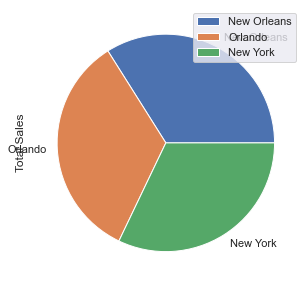

In [60]:
# Determine the top 3 cities with the highest total sales. Provide the city names and the respective total sales amounts.
df.pivot_table(index='City',values='Total Sales',aggfunc=np.max).sort_values(ascending=False,by='Total Sales').head(3).plot(kind='pie',subplots=True,figsize=(10,5))

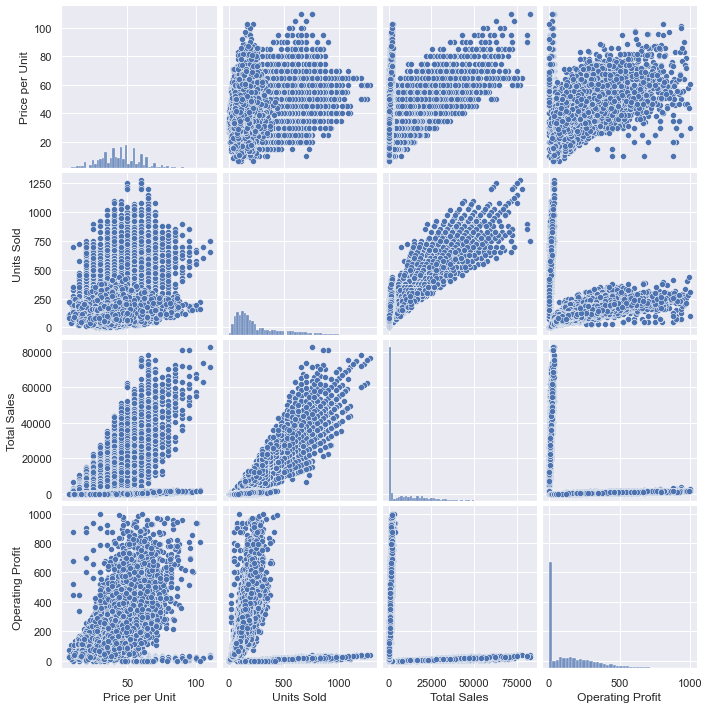

In [63]:
sns.pairplot(df.drop('Retailer ID',axis=1))

<AxesSubplot: xlabel='Units Sold', ylabel='Operating Profit'>

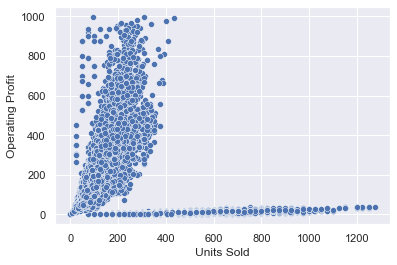

In [67]:
sns.scatterplot(data=df,x='Units Sold',y='Operating Profit')

<AxesSubplot: xlabel='Total Sales', ylabel='Count'>

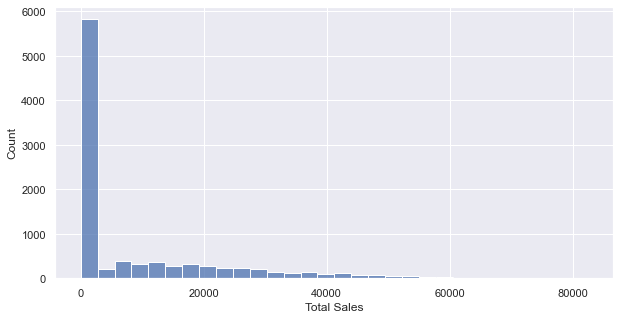

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total Sales'],bins=30)

<AxesSubplot: xlabel='Price per Unit', ylabel='Count'>

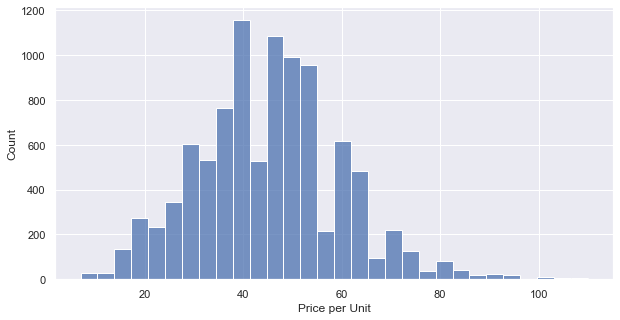

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price per Unit'],bins=30)

<AxesSubplot: xlabel='Units Sold', ylabel='Count'>

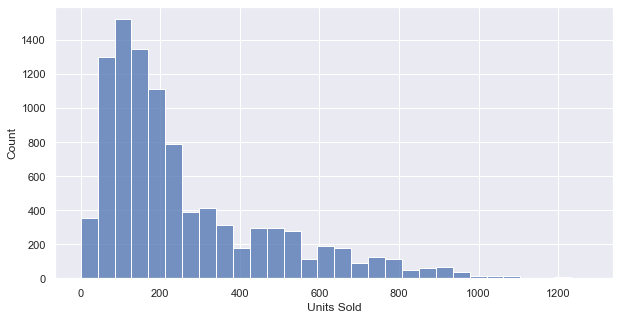

In [84]:
plt.figure(figsize=(10,5))
sns.histplot(df['Units Sold'],bins=30)

<AxesSubplot: xlabel='Operating Profit', ylabel='Count'>

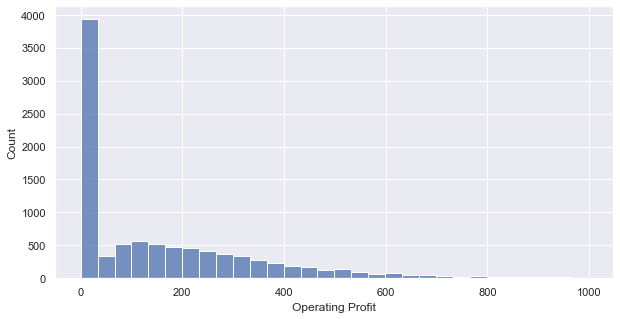

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(df['Operating Profit'],bins=30)

In [91]:
px.pie(data_frame=df,names='Region',values='Total Sales',title='Total Sales Per Region')

In [92]:
px.scatter(data_frame=df,x='Price per Unit',y='Units Sold')

In [94]:
px.box(data_frame=df,x='Sales Method',y='Units Sold',title='Units Sold per Method')

In [104]:
px.bar(data_frame=df,x='Retailer',y='Units Sold',title='Units Sold per Retailer')

<AxesSubplot: >

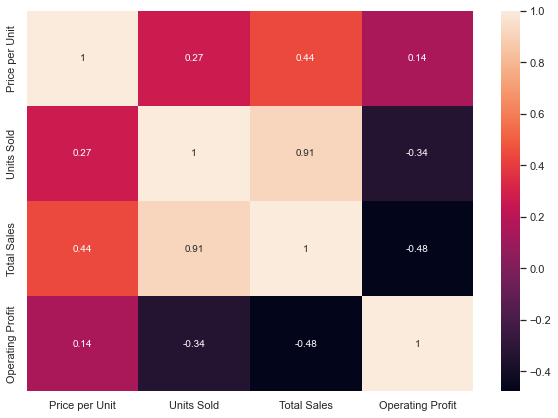

In [112]:
plt.figure(figsize=(10,7))
corr = df.drop('Retailer ID',axis=1).corr()
sns.heatmap(corr,annot=True)

## Build, Fit, Predict and Evaluate The Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
X = df[{'Price per Unit','Units Sold','Total Sales'}]
y = df['Operating Profit']

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
lm.intercept_

-222.74080290100028

In [37]:
lm.coef_

array([-0.023396  ,  7.88671003,  0.97234389])

In [22]:
pred = lm.predict(X_test)

In [38]:
pred

array([-116.24209523,   88.28053708,  299.04391552, ...,   88.28053708,
        486.29020818,  110.85045565])

In [39]:
y_test

2619     20.400
7265    140.000
6094    395.000
8000    279.000
4694    203.000
         ...   
7942    455.000
971      12.650
7168    140.000
6391    514.000
1085      6.563
Name: Operating Profit, Length: 2895, dtype: float64

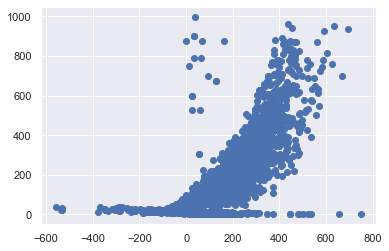

In [23]:
plt.scatter(pred, y_test)

<AxesSubplot: xlabel='Operating Profit', ylabel='Density'>

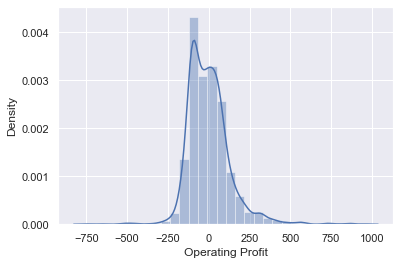

In [25]:
sns.distplot(y_test-pred,bins=30)

In [28]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,pred))
print('RMSE: ',RMSE)

RMSE:  130.25511219312756


In [29]:
MSE = metrics.mean_squared_error(y_test,pred)
print('MSE: ',MSE)

MSE:  16966.394252444246


In [30]:
MAE = metrics.mean_absolute_error(y_test,pred)
print('MAE: ',MAE)

MAE:  93.94598500247011


In [32]:
metrics.explained_variance_score(y_test,pred)

0.5471899772946851

In [33]:
pd.DataFrame(lm.coef_.round(3),X.columns,columns=(['Coeff']))

,Coeff
Total Sales,-0.023
Price per Unit,7.887
Units Sold,0.972
